# Data Explanation 

- It is prepared using real data from socio-economic data from 1990 US Census and 
  crimedata from the 1995 FBI UCR
- This dataset contains a total number of 147 attributes and 2216 instances.

# The columns that we worked on

- murders: number of murders in 1995 
- murdPerPop: number of murders per 100K population 
- rapes: number of rapes in 1995 
- rapesPerPop: number of rapes per 100K population 
- robberies: number of robberies in 1995 
- robbbPerPop: number of robberies per 100K population
- assaults: number of assaults in 1995 
- assaultPerPop: number of assaults per 100K population 
- burglaries: number of burglaries in 1995 
- burglPerPop: number of burglaries per 100K population 
- larcenies: number of larcenies in 1995 
- larcPerPop: number of larcenies per 100K population 
- autoTheftPerPop: number of auto thefts per 100K population 
- arsons: number of arsons in 1995 (num
- ViolentCrimesPerPop: total number of violent crimes per 100K popuation 
- nonViolPerPop: total number of non-violent crimes per 100K popuation

# Liberaries 

In [4]:
import dash
import dash_core_components as dcc
import dash_bootstrap_components as dbc
import dash_html_components as html
import plotly.express as px
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode,iplot
from pandas.io.json import json_normalize
import numpy as np
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

# Reading Data

In [5]:
crimedata = pd.read_csv('crimedata.csv',sep='\s*,\s*',encoding='latin-1',engine='python',na_values=["?"])

In [6]:
crimedata.head(5)

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,1,16656,2.40,1.70,97.35,0.50,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,1,11245,2.76,0.53,89.16,1.17,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79


# Handle nulls

In [7]:
round(crimedata.isnull().sum(axis=0)*100/crimedata.shape[0],2)

Êcommunityname          0.00
state                   0.00
countyCode             55.12
communityCode          55.26
fold                    0.00
                       ...  
autoTheftPerPop         0.14
arsons                  4.11
arsonsPerPop            4.11
ViolentCrimesPerPop     9.98
nonViolPerPop           4.38
Length: 147, dtype: float64

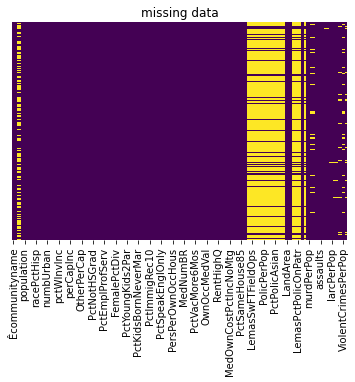

In [8]:
import seaborn as sns
crimedata.isnull().sum()
sns.heatmap(crimedata.isnull(),cmap='viridis',cbar=False,yticklabels=False)

plt.title('missing data')
plt.show()

In [9]:
crimedata = crimedata.rename(columns={'Êcommunityname':'communityName'})
cols = ['HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','PctUnemployed','PctEmploy','murdPerPop','rapesPerPop','robbbPerPop','assaultPerPop','ViolentCrimesPerPop','burglPerPop','larcPerPop','autoTheftPerPop','arsonsPerPop','nonViolPerPop']
crimedata.fillna(crimedata[cols].median(),inplace=True)

# Data Processing

In [10]:
crimedata_state = crimedata.groupby('state').agg({'ViolentCrimesPerPop':'mean','nonViolPerPop':'mean'})[['ViolentCrimesPerPop','nonViolPerPop']].reset_index()
crimedata_state.head(5)

,state,ViolentCrimesPerPop,nonViolPerPop
0,AK,576.576667,4961.673333
1,AL,1030.699070,5020.640233
2,AR,718.550400,6509.575600
3,AZ,551.094500,6532.186000
4,CA,808.905197,5139.440251


In [11]:
type_of_criems=['murders', 'rapes', 'robberies', 'assaults', 'burglaries', 'larcenies', 'autoTheft', 'arsons']

total_crimes=0
crimes= []
for i in type_of_criems:
    total_crimes+=crimedata[i].sum()
    x=crimedata[i].sum()
    crimes.append(x)
    
print(total_crimes,crimes)
total_crime='8,940,193'   

8940193.0 [17199, 56289.0, 526826.0, 719015.0, 1683856.0, 4728436.0, 1142924.0, 65648.0]


In [12]:
murders_percentage=(crimes[0]/total_crimes)*100
rapes_percentage=(crimes[1]/total_crimes)*100
robberies_percentage=(crimes[2]/total_crimes)*100
assaults_percentage=(crimes[3]/total_crimes)*100
burglaries_percentage=(crimes[4]/total_crimes)*100
larcenies_percentage=(crimes[5]/total_crimes)*100
autoTheft_percentage=(crimes[6]/total_crimes)*100
arsons_percentage=(crimes[7]/total_crimes)*100


In [13]:
crimedata[['population','state']]

,population,state
0,11980,NJ
1,23123,PA
2,29344,OR
3,16656,NY
4,11245,MN
...,...,...
2210,56216,CA
2211,12251,LA
2212,32824,CA
2213,13547,TX


# Bar1

What is the Crimes Precentage for each City?

In [14]:
crime_type_ber_state=crimedata.groupby(by='state')[['murders', 'rapes', 'robberies', 'assaults', 'burglaries', 'larcenies', 'autoTheft', 'arsons']] .sum()
crime_type_ber_state_T = crime_type_ber_state.T
crime_type_ber_state_T["Crimes"]=['murders', 'rapes', 'robberies', 'assaults', 'burglaries', 'larcenies', 'autoTheft', 'arsons']
crime_type_ber_state_T.head(5)

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,Crimes
murders,29.0,326.0,142.0,248.0,3272.0,146.0,195.0,454.0,0.0,560.0,...,303.0,1681.0,34.0,355.0,2.0,161.0,199.0,31.0,3.0,murders
rapes,249.0,1046.0,636.0,1172.0,9065.0,1238.0,635.0,324.0,36.0,3056.0,...,1351.0,6976.0,432.0,1173.0,41.0,1573.0,904.0,185.0,59.0,rapes
robberies,651.0,5836.0,2565.0,5850.0,113334.0,3736.0,6269.0,7107.0,78.0,27216.0,...,7631.0,25285.0,774.0,6627.0,14.0,5480.0,5409.0,573.0,36.0,robberies
assaults,1571.0,16086.0,7264.0,16200.0,148772.0,11341.0,5824.0,9003.0,145.0,47525.0,...,12477.0,49564.0,1633.0,8009.0,57.0,10825.0,3873.0,1165.0,365.0,assaults
burglaries,2259.0,30462.0,16317.0,45629.0,306585.0,25308.0,27516.0,11532.0,251.0,108475.0,...,30235.0,168969.0,7964.0,24315.0,1048.0,34838.0,21077.0,4025.0,851.0,burglaries


# Bar2

What is the 10 Cities with high crime rate?

In [15]:
crime_type_ber_state_top=crimedata.groupby(by='state', as_index=False)[['murders', 'rapes', 'robberies', 'assaults', 'burglaries', 'larcenies', 'autoTheft', 'arsons']] .sum()
crime_type_top = pd.DataFrame (type_of_criems, columns = ['crime_type'])

# Mab 1

Showing the distrbution for non-Violent Crimes ber population

In [16]:
data1 = dict(type='choropleth',
        colorscale = 'Viridis',
        autocolorscale = False,
        locations = crimedata_state['state'],
        locationmode = 'USA-states',
        z = crimedata_state['nonViolPerPop'].astype(float),
        colorbar = {'title':'non-Violent Crimes'}
        )
layout1 = dict(
        title = 'Aggregate view of non-Violent Crimes Per 100K Population',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor='rgb(85,173,240)'),
                )
    
fig1 = go.Figure(data = [data1],layout = layout1)

# Mab 2

Showing the distrbution for Violent Crimes ber population

In [17]:
data2 = dict(type='choropleth',
        autocolorscale = False,
        colorscale = "Earth",
        locations = crimedata_state['state'],
        locationmode = 'USA-states',
        z = crimedata_state['ViolentCrimesPerPop'].astype('float'),
        colorbar = {'title':'Violent Crimes'}
        )
layout2 = dict(
        title = 'Aggregate view of Violent Crimes Per 100K Population across US',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(85,173,240)'),

             )
    
fig2 = go.Figure(data = [data2],layout = layout2)


# Mab 3 and 4

Showing the highest ceties with non-Violent  and Violent crimes

In [18]:
#####thesecond graph cities
# Let's find out the outliers in `ViolentCrimesPerPop` response variable and plot those to find cities with highest crime rate in the US
quartile_1, quartile_3 = np.percentile(crimedata['ViolentCrimesPerPop'], [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)
outliers_viol = crimedata.loc[crimedata['ViolentCrimesPerPop']>upper_bound,['communityName','state','ViolentCrimesPerPop']]


## Let's find out the outliers in `nonViolPerPop` response variable and plot those to find cities with highest crime rate in the US
quartile_1, quartile_3 = np.percentile(crimedata['nonViolPerPop'], [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)
outliers_nviol = crimedata.loc[crimedata['nonViolPerPop']>upper_bound,['communityName','state','nonViolPerPop']]

## Remove community Name(s) ending with "city". This helps dataframe(s) merging easier to get lat and lon
outliers_viol['communityName'] = outliers_viol['communityName'].map(lambda result : re.sub(r'city','',result))
outliers_nviol['communityName'] = outliers_nviol['communityName'].map(lambda result : re.sub(r'city','',result))

## read citie.json file to get latitude and longitude details of the cities
file = "cities.json"
with open(file) as city_file:
    dict_city = json.load(city_file)
    cities_lat_lon = json_normalize(dict_city)

## merge cities dataframe(with cities_lat_lon dataframe to get lat and lon of the cities) with outliers_viol dataframe 
##and outliers_nviol to plot cities with highest violent/non-vilolent crime rate

violent_crime_cities = pd.merge(outliers_viol,cities_lat_lon,left_on=["communityName","state"],right_on=["city","state"])
violent_crime_cities = violent_crime_cities.drop(["city"],axis=1)
#print (violent_crime_cities)

nonviolent_crime_cities = pd.merge(outliers_nviol,cities_lat_lon,left_on=["communityName","state"],right_on=["city","state"])
nonviolent_crime_cities = nonviolent_crime_cities.drop(["city"],axis=1)
#print (nonviolent_crime_cities)


## Cities with highest  non-violent crime rate
levels = [(0,20),(21,30),(31,40),(41,50),(51,80)]
colors = ['rgb(255,133,27)','rgb(31,120,180)','rgb(178,223,138)','rgb(251,154,153)','rgb(227,26,28)']
plot_data = []
for i in range(len(levels)):
    lim = levels[i]
    nonviolent_crime_cities_sub = nonviolent_crime_cities[lim[0]:lim[1]]
    city_outline = dict(
        type = "scattergeo",
        locationmode = 'USA-states',
        lon = nonviolent_crime_cities_sub['longitude'],
        lat = nonviolent_crime_cities_sub['latitude'],
        text = nonviolent_crime_cities_sub['communityName'] +' '+ nonviolent_crime_cities_sub['nonViolPerPop'].astype(str),
        mode = "markers",
        marker = dict(
        size = nonviolent_crime_cities_sub['nonViolPerPop']/800,
        color = colors[i],
        ),  
    name = '{0} - {1}'.format(lim[0],lim[1])
    )
    layout1 = dict(
        title = 'Cities with highest non-Violent Crime rate',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(85,173,240)'), 
    )
    plot_data.append(city_outline)
    
fig3= dict( data=plot_data, layout=layout1)
    
    
## Cities with highest violent crime rate
levels = [(0,30),(31,60),(61,90),(91,120),(121,170)]
colors = ['rgb(175,175,50)','rgb(131,120,180)','rgb(78,230,138)','rgb(251,24,153)','rgb(227,126,28)']
cities = []
for i in range(len(levels)):
    lim = levels[i]
    violent_crime_cities_sub = violent_crime_cities[lim[0]:lim[1]]
    city_outline = dict(
        type = "scattergeo",
        locationmode = 'USA-states',
        lon = violent_crime_cities_sub['longitude'],
        lat = violent_crime_cities_sub['latitude'],
        text = violent_crime_cities_sub['communityName'] +' '+ violent_crime_cities_sub['ViolentCrimesPerPop'].astype(str),
        mode = "markers",
        marker = dict(
        size = violent_crime_cities_sub['ViolentCrimesPerPop']/200,
        color = colors[i]
        ),  
    name = '{0} - {1}'.format(lim[0],lim[1])
    )
    layout2 = dict(
        title = 'Cities with highest Violent Crime rate',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(85,173,240)'),
    ) 
    cities.append(city_outline)
    
fig4= dict( data=cities, layout=layout2)

C:\Users\faiza\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:25: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



# BANS

In [19]:
bans_style={'margin': 12,
            'width': 150, 
            'border-radius': '80px',
            "border": "3px solid black",
            'backgroundColor': 'white', 
            'padding': 10, 
            'float': 'left',"text-align": "left!important"}

bans_header_style={'fontSize': 18,
              'color': 'gray',
              "text-align": "center"}


bans=dbc.Col(children=[
        dbc.Row(children=[
            dbc.Col(html.Div(className="summary-1", children=[
            
            html.H6('Murders', className='my-class',
                    style=bans_header_style),
            html.H5(f"{murders_percentage:,.2f}%", className='my-class', 
                    style={'color': '#959FF9',"text-align": "center",
                          'font-size': '36px','font-weight': 'bold'})],

                 style=bans_style)),
            dbc.Col( html.Div(className="summary-1", children=[
            html.H6('Rapes', className='my-class', style=bans_header_style),
            html.H5(f"{rapes_percentage:,.2f}%", className='my-class',
                    style={'color': '#EF553B',"text-align": "center",
                           'font-size': '36px','font-weight': 'bold'})],
                 style=bans_style)),
            
            
            dbc.Col( html.Div(className="summary-1", children=[
            html.H6('Robberies', className='my-class', style=bans_header_style),
            html.H5(f"{robberies_percentage:,.2f}%", className='my-class',
                    style={'color': '#00CC96',"text-align": "center",
                          'font-size': '36px','font-weight': 'bold'})],
                 style=bans_style)),
            
            
            dbc.Col( html.Div(className="summary-1", children=[
            html.H6('AutoTheft', className='my-class', style=bans_header_style),
            html.H5(f"{autoTheft_percentage:,.2f}%", className='my-class', style=
                    {'color': '#FF6692',"text-align": "center",
                      'font-size': '36px','font-weight': 'bold'})],
                 style=bans_style)),
        ]), 
    
    
    dbc.Row(children=[dbc.Col(html.Div(className="summary-1", children=[
            html.H6('Assaults', className='my-class', style=bans_header_style),
            html.H5(f"{assaults_percentage:,.2f}%", className='my-class', 
                    style={'color': '#AB63FA',"text-align": "center",
                          'font-size': '36px','font-weight': 'bold'})],
                 style=bans_style)),
                      
                      
            dbc.Col(html.Div(className="summary-1", children=[
            html.H6('Burglaries', className='my-class', style=bans_header_style),
            html.H5(f"{burglaries_percentage:,.2f}%", className='my-class', 
                    style={'color': '#FFA15A',"text-align": "center",
                          'font-size': '36px','font-weight': 'bold'})],
                 style=bans_style)),
                      
                      
                      
                      
            dbc.Col(html.Div(className="summary-1", children=[
            html.H6('Larcenies', className='my-class', style=bans_header_style),
            html.H5(f"{larcenies_percentage:,.2f}%", className='my-class', 
                    style={'color': '#19D3F3',"text-align": "center",
                          'font-size': '36px','font-weight': 'bold'})],
                 style=bans_style)),
                      
                      
                      
            dbc.Col( html.Div(className="summary-1", children=[
            html.H6('Arsons', className='my-class', style=bans_header_style),
            html.H5(f"{arsons_percentage:,.2f}%", className='my-class', 
                    style={'color': '#B6E880',"text-align": "center",
                          'font-size': '36px','font-weight': 'bold'})],
                 style=bans_style))
                     ])],
             style={"width":"60%","align-items":"center" ,'display': 'inline-block'})

circle=html.Div(className="graphs-summary", children=[
    dbc.Row(children=[
    dbc.Col(html.Div(className="summary-1", children=[
            html.H6('Total Crimes', className='my-class',
                    style={'fontSize': 20,
                           'color': 'gray',
                           "padding-top": "55px"}),
        
            html.H5(total_crime, className='my-class', 
                    style={'color': '#FFA15A',"text-align": "center",
                          'font-size': '36px','font-weight': 'bold'})],
                     
                 style={'margin': 12,
                        'width': "200px",
                        "border": "3px solid black",
                        "height":"200px",
                        'border-radius': '200px'
                        ,'backgroundColor': 'white', 
                        'float': 'left', 'padding': 14,
                        "text-align": "center",
                         'margin-top': '-40px'}),
  
            
            )])],style={"width":"18%",
                        "height":"237px", 
                        'display': 'inline-block',
                        "padding-left": "218px"})


# Putting the graph to DashBoard

In [20]:
app = dash.Dash(name=" UCI Crime and Communities",external_stylesheets=['https://codepen.io/chriddyp/pen/bWLwgP.css',"https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css"])
app

In [21]:
st_border={ "border": "10px solid #a95b0c",
 "border-radius": "22px",
  "margin": "9px 7px"}


bars=html.Div(children=[html.Div(className="summary-1", children=[
                dcc.Dropdown(
                id="dropdown2",
                options = [{'label': str(crime_type), 'value': str(crime_type)} for crime_type in crime_type_top['crime_type'].unique()],
                value="murders",
                clearable=False,
                style={"margin-bottom": "10px"}
                ),
                dcc.Graph(id="graph2",style=st_border),],style={'width': '49%', 
                                                                'display': 'inline-block',
              'vertical-align': 'middle', "padding": "40px 10px 10px 0px"},),           
            html.Div(className="summary-1", children=[
                dcc.Dropdown(
                id="dropdown1",
                options = [{'label': str(state), 'value': str(state)} for state in crimedata['state'].unique()],
                value="TX",
                clearable=False,
                style={"margin-bottom": "10px"}),
                dcc.Graph(id="graph1",style=st_border),],style={'width': '49%', 
                               'display': 'inline-block', 
                                'vertical-align': 'middle',
                                "padding":"40px 10px 10px 0px"},)])

In [22]:
maps=html.Div(children=[html.Div(className="summary-1", children=[
            dcc.Graph(
                id='example-map',
                className='six column',
                figure=fig1
                ),],
                      style={'width': '48%', 
                            'display': 'inline-block', 
                            "border": "10px solid #a95b0c",
                            "border-radius": "22px",
                            "margin": "24px 0px 10px 0px"},),

                        
            html.Div(className="summary-1", children=[
                dcc.Graph(
                className='six column',
                figure=fig2
                ),],
                     style={'width': '48%',
                            'display': 'inline-block',
                            "border": "10px solid #a95b0c",
                             "border-radius": "22px",
                              "margin":"24px 0px 10px 12px"}),
                        
                        
            html.Div(className="summary-1", children=[
                dcc.Graph(
                className='six column',
                figure=fig3
                ),],style={'width': '48%', 
                            'display': 'inline-block', 
                            "border": "10px solid #a95b0c",
                            "border-radius": "22px",
                            "margin": "24px 0px 10px 0px"}),
                        
                        
                        
                        
            html.Div(className="summary-1", children=[
                dcc.Graph(
                className='six column',
                figure=fig4
                ),],style={'width': '48%',
                            'display': 'inline-block',
                            "border": "10px solid #a95b0c",
                             "border-radius": "22px",
                              "margin":"24px 0px 10px 12px"})
                       ])
                
                

In [ ]:
title_style={   'text-align': 'center',
                'margin-bottom': '0px',
                'font-size': '80px',
                'font-weight': 'bold',
                'padding-top': '20px',
                'padding-bottom': '61px',
                'color': "#a95b0c"}


app.layout = html.Div([
                    html.Div([
            html.Div([
                html.H3("UCI Crime and Communities", style=title_style),
                ])
        ], className="six column", id="title"),
    #################################################################################################################
     # Summary Div Design
    html.Div(className="graphs-summary", children=[ circle,
        bans
         ,html.Div(style={'width': '100%', 
                          "border": "1px solid #a95b0c",
                          "margin": "24px 0px 10px 0px"} )                                        
      ,bars,
       maps
    ]),])
    

@app.callback(
    Output("graph1", "figure"), 
    Input("dropdown1", "value"))
def update_bar_chart(state):
    df = crime_type_ber_state_T # replace with your own data source
    mask =df[state]
    fig1 = px.bar(df, x="Crimes", y=mask, text_auto=True,color="Crimes")
    fig1.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', xaxis_tickangle=-90,\
                   title={'text': 'Crimes Precentage by State','y':0.96,'x':0.5, 'xanchor': 'center','yanchor': 'top'})
  
    return fig1


@app.callback(
    Output("graph2", "figure"), 
    Input("dropdown2", "value"))
def update_bar_chart(crime):
    df =crime_type_ber_state_top.sort_values(by=crime ,ascending=False)[0:10] # replace with your own data source
    mask = df[crime] 
    fig2 = px.bar(df, x="state", y=mask , text_auto=True,color=mask)
    fig2.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', xaxis_tickangle=-90,\
                   title={'text': 'Top 10 State','y':0.96,'x':0.5, 'xanchor': 'center','yanchor': 'top'})
    return fig2


app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app ' UCI Crime and Communities' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Apr/2022 13:21:52] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2022 13:21:53] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2022 13:21:53] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2022 13:21:53] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2022 13:21:53] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2022 13:21:54] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\faiza\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\faiza\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\faiza\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\faiza\anaconda3\envs\tf\lib\site-packages\flask\app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "C:\Users\faiza\anaconda3\envs\tf\lib\site-packages\dash\dash.py", line 1345, in dispatch
    response.set_data(func(*args, outputs_list=outputs_list))
  File "C:\Users\faiza\anaconda3\envs\tf\lib\site-packages\dash\_callback.py", line 151, in add_context
    output_value = func(*func_args, **f

127.0.0.1 - - [29/Apr/2022 13:21:54] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [29/Apr/2022 13:21:55] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2022 13:30:17] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2022 13:30:21] "POST /_dash-update-component HTTP/1.1" 200 -
